In [2]:
import csv

txt_file = r"oct_temp_new.txt"
csv_file = r"octubercsv.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

            aravali_241  aravali_25  aravali_244  aravali_243  aravali_234  \
TS                                                                           
2016-09-30     2.716135    2.224667     5.263479     2.797760     4.616042   
2016-10-01     5.276656    4.520896     7.435167     7.988698     7.752042   
2016-10-02     4.613531    4.911583     7.462146     8.158354     7.684500   
2016-10-03     4.770340    4.552421     7.249658     7.943187     7.723075   
2016-10-04     4.491159    5.007838     5.775312     6.379036     7.214461   
2016-10-05     5.280595    4.599408     5.962092     6.498089     6.310735   
2016-10-06     5.102250    4.070958     6.031042     5.298844     6.970813   
2016-10-07     5.082823    4.124896     7.126021     6.999823     8.108438   
2016-10-08     5.477938    4.979396     5.779438     7.936792     7.987125   
2016-10-09     4.913208    4.691271     6.563896     6.209510     8.054146   
2016-10-10     4.473543    4.586714     4.920583     7.300001   

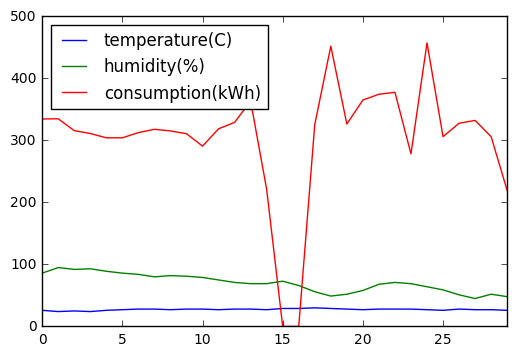

In [2]:
import pandas as pd
import os
import numpy as np
import datetime

from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pymongo import MongoClient


client=MongoClient('127.0.0.1:27017')
db=client.test4
DF = pd.DataFrame()
for flat_name in db.collection_names():
    if flat_name[:7] == 'aravali' and flat_name[-3:] == 'Oct' :
        flat = db[flat_name]
#         print(flat_name)
    else:
        continue
    tdf = np.abs(pd.DataFrame(list(flat.find({},{'_id':0,'TS':1,'con':1}))))
#     print(tdf)
    tdf = tdf.set_index(['TS'])
    tdf.index = pd.to_datetime(tdf.index, unit='s')
    tdf = tdf['con'].resample('D').mean()
#     print(tdf)
    DF[flat_name[:-3]] = (tdf.shift(-1) - tdf)/1000
#     print(DF[flat_name[:-3]])
pd.set_option('display.max_rows', len(DF))
pd.set_option('display.max_columns', None)
del DF['aravali_3']
del DF['aravali_208']
# del DF['aravali_230']
del DF['aravali_11']
# del DF['aravali_239']
del DF['aravali_22']
# del DF['aravali_2']
del DF['aravali_10']
# # del DF['aravali_223']
# del DF['aravali_224']
del DF['aravali_1']


print(DF)
DF=DF.drop(DF.index[[0]])
DF=DF.drop(DF.index[[30]])

   
# print(DF)

DF.round(2)
sumcon = DF.sum(axis=1)  


# print(DF) 

# plt.plot(sumcon)

temp = pd.read_csv('octubercsv.csv')
temp = temp.drop(temp.index[[30]])
print(temp)
sc = list(sumcon)

temp['con'] = sc
print("max = ", max(sc) , min(list(filter((0.0).__ne__, sc))))
temp.columns = ['temperature(C)', 'humidity(%)','consumption(kWh)']
temp.plot()
# plt.show()
plt.savefig('Oct.png')
temp.corr().to_csv("Octuber.csv")
temp.to_csv('octuber.csv')
print(temp.corr())
# sumcon['temp'] = temp['tempavg']
# sumcon['humid'] = temp['humidavg']

print(temp)